<img src="../Img/sci.png">

### <center> Финансовый университет
## <center>  Инструментальная поддержка анализа<br> финансово-экономических данных
## <center> Тема 4. Введение в машинное обучение. Задачи регрессии

Семинар<br>
27 марта 2021 года<br>
Поток: ПМ18-1, ПМ18-2, ПМ18-3, ПМ18-4

Преподаватель: Смирнов Михаил Викторович, mvsmirnov@fa.ru

## 1. Регрессионные модели и методы
### 1.1. Метод наименьших квадратов

Рассмотрим метод наименьших квадратов (МНК) на примере анализа финансово-экономических данных. Имеются данные об изменении цены акции компании "Роснефть" в течение одного дня 12 февраля 2021 года в csv-формате. Источник: <a href="https://www.finam.ru/">finam.ru</a>. Измерения проводились через равные промежутки времени в течение дня. Представим эти данные в табличном виде. Добавим столбец ${m\_id}$ для номера измерения.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("./Data/ROSN_210212_210212_hour.csv", sep=';')
data['m_id']=np.arange(1,len(data)+1)
data

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,m_id
0,ROSN,60,12/02/21,110000,496.20,1
1,ROSN,60,12/02/21,120000,489.90,2
2,ROSN,60,12/02/21,130000,494.05,3
3,ROSN,60,12/02/21,140000,496.45,4
4,ROSN,60,12/02/21,150000,498.90,5
5,ROSN,60,12/02/21,160000,498.80,6
6,ROSN,60,12/02/21,170000,502.70,7
7,ROSN,60,12/02/21,180000,502.35,8
8,ROSN,60,12/02/21,190000,504.15,9
9,ROSN,60,12/02/21,200000,505.25,10


Построим график

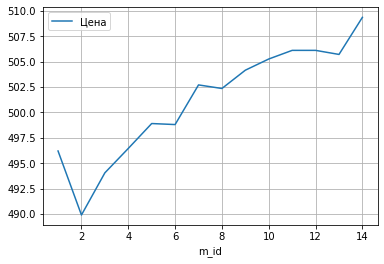

In [3]:
data.plot(x='m_id', y='<CLOSE>', label='Цена', grid=True)

Обозначим цену акции $y$, а момент времени, в который цена измерена $x$. Построим линейную модель имеющихся данных. Линейная модель зависимости $\widehat{y}$ от одной независимой переменной $x$ выражается уравнением $\widehat{y}=w_0+wx$, где $w_0, w$ - коэффициенты или параметры модели. С помощью МНК находят такие значения параметров модели, при которых сумма квадратов расстояний значений измеренной величины от значений модели минимально. Для этого минимизируют функцию

$$
E(w_0, w)=\sum_{i=0}^I(y_i-w_0-wx_i)
$$

посредством решения системы уравнений

$$
\begin {cases} 
{\frac{dE(w_0, w)}{dw_0}=0} \\ \\
{\frac{dE(w_0, w)}{dw}=0}
\end {cases}
$$


В процессе решения системы уравнений параметры модели могут быть выражены через значения дисперсии и ковариации признаков, что оказывается удобным для их расчета:

$$
w=\frac{Cov_{xy}}{Disp_x} \\
w_0=M(y)- w \cdot M(x)
$$

где $M(\cdot)$ - математическое ожидание.

Приведенная система уравнений может быть решена и в матричном виде. Для этого предположим, что имеется фиктивная переменная $x_0=1$. Тогда уравнение модели принимает вид $\widehat{y}=w_0x_0+wx = {w}^T {x}$, где $w$ - вектор параметров модели, $x$ - вектор независимых переменных.
 В общем случае, когда имеется $I$ независимых переменных, $x_1, x_2, ... x_I$, уравнение модели принимает вид 

$$
\widehat{y} = \sum_{i=0}^I w_i x_{i} = X{w}^T
$$

</Table>
где $X$ - матрица признаков, в которой $n$ строк по числу независимых переменных и $I+1$ столбец, включая единичный столбец фиктивной переменной слева; $w$ - вектор параметров модели.

Параметры $w$ находят методом наименьших квадратов, минимизируя отклонение $\widehat{y}$ от $y$, которое носит случайный характер и обозначается $\epsilon$. В матричном виде

$$ w=({X}^{T} {X})^{-1} {X}^{T}{y} $$

Реализуем решение в матричном виде. Сначала построим матрицу $X$.

In [4]:
x0=np.ones(len(data))
x1=np.array(data['m_id'])
X=np.stack((x0,x1),axis=1)
print(X)

[[ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  9.]
 [ 1. 10.]
 [ 1. 11.]
 [ 1. 12.]
 [ 1. 13.]
 [ 1. 14.]]


Создадим массив значений $y$.

In [5]:
y=np.array(data['<CLOSE>'])
print(y)

[496.2  489.9  494.05 496.45 498.9  498.8  502.7  502.35 504.15 505.25
 506.1  506.1  505.7  509.35]


Подставим $w$ и $y$ в формулу.

In [6]:
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
print(w)

[491.77692308   1.24879121]


Мы получили значения $w_0$ и $w_1$. Построим график $\widehat{y}$.

Text(0, 0.5, 'Цена')

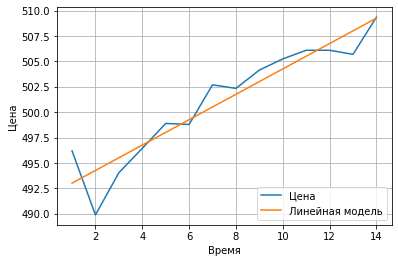

In [7]:
plt.plot(data['m_id'], data['<CLOSE>'], label='Цена')
plt.plot(data['m_id'], w[0]+X[:,1]*w[1], label='Линейная модель')
plt.legend(loc=4)
plt.grid()
plt.xlabel('Время')
plt.ylabel('Цена')

### 1.2. Метод градиентного спуска
При обработке больших данных, а также в ходя решения ряда практических задач использование метода наименьших квадратов связано с вычислительными сложностями. В таком слачае применяют метод градиентного спуска - метод нахождения локального минимума или максимума функции с помощью последовательного, состоящего из множества шагов движения вдоль градиента.  В случае функции одной  переменной $y=f(x)$ градиент вычисляется как

$$
\frac{df(x)}{dx} \cdot{i}
$$

где $i=(1;0)$ - единичный вектор, задающий направление вдоль оси $X$. Реализуем следующий алгоритм. Выберем начальную точку на оси абсцисс, в которой вычисляется значение градиента. На каждом следующем шаге $n+1$ найдем значение следующей точки на оси абсцисс исходя из уравнения

$$
x_{n+1}=x_{n}-\lambda\cdot\frac{df(x_n)}{dx} \cdot{i}
$$

где $n=0, 1, 2, 3, ...$

Знак производной определяет направление движения, а ее величина определяет величину интервала смещения. Шаги повторяются до нахождения точки, в которой значение градиента близко к нулю, а значение $y$ близко к минимуму. Необязательный коэффициент $\lambda$, называемый шагом сходимости алгоритма, позволяет уменьшать интервал смещения для более точного поиска. Применим метод градиентного спуска к имеющимся данным. На каждом шаге алгоритма будем вычислять величину ошибки (Loss) по формуле

$$
\mathcal{L}({X}, {y}, {w}) = \frac{1}{2n} \sum_{i=1}^n (y_i - {w}^{{T}} {x}_i)^2
$$

где $n$ - число измерений и ее производную 

$$
\frac{d\mathcal{L}}{dw} = \frac{1}{n} \sum_{i=1}^n {(y-wx)(-x)} = -\frac{1}{n}\cdot {X}\cdot{(y-wX)}
$$


Используем следующие переменные:
- lmd - шаг сходимости алгоритма (лямбда)
- X - матрица независимых переменных
- y - вектор значений цены акции
- y_model - вектор модельных значений цены акции
- delta - разность экспериментального и модельного значений
- w - вектор параметров модели, начальные значения выбираем (1; 1)
- nIterations - число шагов
- gradient - градиент


In [8]:
def gradient_descent(lmd, X, y, nIterations):
    n=X.shape[0]
    w=np.ones(X.shape[1])
    
    for i in range(nIterations):
        y_model=np.dot(X,w)
        delta=y_model-y
        L=np.sum(delta**2)/(2*n)
        gradient=np.dot(X.T, delta)
        w-=lmd*gradient / n
    return w

In [9]:
gradient_descent(0.027, X, y, 1000)

array([490.57997133,   1.37299369])

Мы получили значения, близкие к значениям, рассчитанным методом наименьших квадратов. Отметим, что эти значения можно значительно улучшить, тщательно подобрав параметры *nIterations* и *lmd*.

### 1.3. Экспоненциальное сглаживание

### 1.3.1. Изучение данных
Файл с данными, которые будем обрабатывать. Источник: <a href=https://www.finanz.ru/>*finanz.ru*</a>.

In [10]:
df = pd.read_csv('Data/HistoricPricesAppleBAE.csv', sep=';')
df

,Date,Open,ClosingPrice,DailyHigh,DailyLow,VolumePcs
0,06.11.2020,NaN,"99,91500","100,27000","99,42500",NaN
1,05.11.2020,NaN,"100,60000","100,86000","100,13000",NaN
2,04.11.2020,NaN,"98,09500","98,51500","97,69500",NaN
3,03.11.2020,NaN,"94,35500","95,24000","93,81500",NaN
4,02.11.2020,NaN,"93,39500","93,45000","92,34000",NaN
...,...,...,...,...,...,...
208,08.01.2020,NaN,"68,20625","68,50625","67,98750",NaN
209,07.01.2020,NaN,"66,93125","67,32500","66,84375",NaN
210,06.01.2020,NaN,"66,95000","67,00625","66,78750",NaN
211,03.01.2020,NaN,"66,61250","67,26250","66,61250",NaN


Удалим столбцы с пустыми значениями и отобразим основнуб информацию о таблице.

In [11]:
df=df.drop(['Open','VolumePcs'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          213 non-null    object
 1   ClosingPrice  213 non-null    object
 2   DailyHigh     209 non-null    object
 3   DailyLow      209 non-null    object
dtypes: object(4)
memory usage: 6.8+ KB


Столбцы Date и ClosingPrice имеют тип 'object'. Фактически это означает, что в них содержится информация текстового типа. Выполним преобразование типов.

In [12]:
df['ClosingPrice']=df['ClosingPrice'].str.replace(",",".")
df['ClosingPrice']=pd.to_numeric(df['ClosingPrice'])
df['Date']=pd.to_datetime(df['Date'],dayfirst=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          213 non-null    datetime64[ns]
 1   ClosingPrice  213 non-null    float64       
 2   DailyHigh     209 non-null    object        
 3   DailyLow      209 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 6.8+ KB


Отсортируем данные по возрастанию даты.

In [14]:
df=df.sort_values('Date')
df.head()

,Date,ClosingPrice,DailyHigh,DailyLow
212,2020-01-02,67.28750,"67,28750","66,71250"
211,2020-01-03,66.61250,"67,26250","66,61250"
210,2020-01-06,66.95000,"67,00625","66,78750"
209,2020-01-07,66.93125,"67,32500","66,84375"
208,2020-01-08,68.20625,"68,50625","67,98750"


In [15]:
df.index=range(len(df))

Построим график

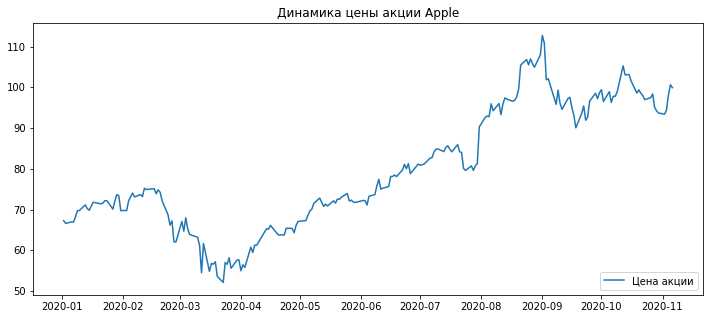

In [16]:
plt.figure(figsize=(12, 5))
plt.title('Динамика цены акции Apple', loc='center')
x = df['Date']
y = df['ClosingPrice']
plt.plot(x, y, label='Цена акции')
plt.legend(loc='lower right')

Найдем параметры линии тренда $w$ и $w_0$. Создадим стобец с номером измерения, значения которого начинаются от 1.

In [17]:
df['m_id']=pd.Series(list(range(1, len(df)+1)))

Построим матрицу признаков

In [18]:
x0=np.ones(len(df))
x1=df['m_id']
y=df['ClosingPrice']
X=np.stack((x0,x1),axis=1)

In [19]:
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
print(w)

[58.18987161  0.20316988]


Добавим столбец тренда

In [20]:
df['Trend'] = w[0] + w[1] * df['m_id']

Отобразим тренд на графике

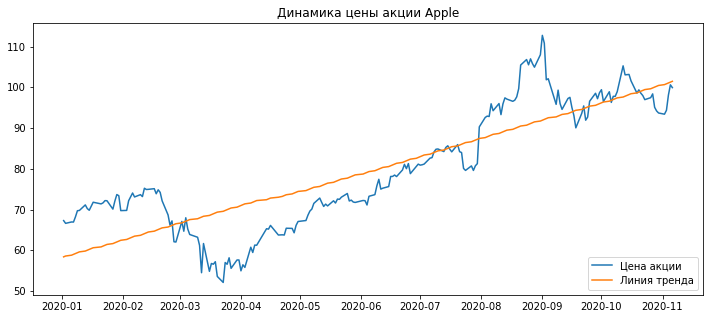

In [21]:
plt.figure(figsize=(12, 5))
plt.title('Динамика цены акции Apple', loc='center')
x = df['Date']
y = df['ClosingPrice']
ym = df['Trend']
plt.plot(x, y, label='Цена акции')
plt.plot(x, ym, label='Линия тренда')
plt.legend(loc='lower right')

### 1.3.2. Экспоненциальное сглаживание
Проведем экспоненциальное сглаживание.

$$
S_{i+1}=Y_i\cdot\alpha+S_i \cdot (1-\alpha)
$$


In [22]:
alfa = 0.1 # Начальное значение коэффициента сглаживания
while alfa < 1: # выполняется цикл до тех пор, пока alfa меньше единицы
  ExpColumnName = 'Exp0' + str(alfa)[2] # Формируем имя столбца сглаженных значений: Exp01, Exp02 и т. д. до Exp09
  L = [] # Список, в который будем помещать сглаженные значения, сейчас он пуст
  for i in range(len(df)): # создаем цикл от нуля до числа, равного числу строк в таблице минус один
    if i == 0: # первый день
      L.append(np.NaN) # добавляем в список пустое значение, так как сглаженного значения в первый день нет
    elif i == 1: # второй день
      L.append(df['ClosingPrice'][0]) # добавляем в список значение цены в первый день (строка с индексом [0])
    else: # все последующие дни
      L.append(alfa * df['ClosingPrice'][i-1] + (1-alfa) * L[i-1]) # добавляем в список сглаженное значение, сформированное из предыдущего значения цены и предыдущего значения списка
  df[ExpColumnName] = pd.Series(L) # добавляем в датафрейм столбец, содержащий элементы сформированного списка сглаженных значений
  alfa += 0.1 # приращение коэффициента сглаживания

In [23]:
df.head()

,Date,ClosingPrice,DailyHigh,DailyLow,m_id,Trend,Exp01,Exp02,Exp03,Exp04,Exp05,Exp06,Exp07,Exp08,Exp09
0,2020-01-02,67.28750,"67,28750","66,71250",1,58.393041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-03,66.61250,"67,26250","66,61250",2,58.596211,67.287500,67.28750,67.287500,67.2875,67.287500,67.28750,67.2875,67.287500,67.28750
2,2020-01-06,66.95000,"67,00625","66,78750",3,58.799381,67.220000,67.15250,67.085000,67.0175,66.950000,66.88250,66.7475,66.680000,66.61250
3,2020-01-07,66.93125,"67,32500","66,84375",4,59.002551,67.193000,67.11200,67.044500,66.9905,66.950000,66.92300,66.9095,66.923000,66.95000
4,2020-01-08,68.20625,"68,50625","67,98750",5,59.205721,67.166825,67.07585,67.010525,66.9668,66.940625,66.92795,66.9269,66.930425,66.93125


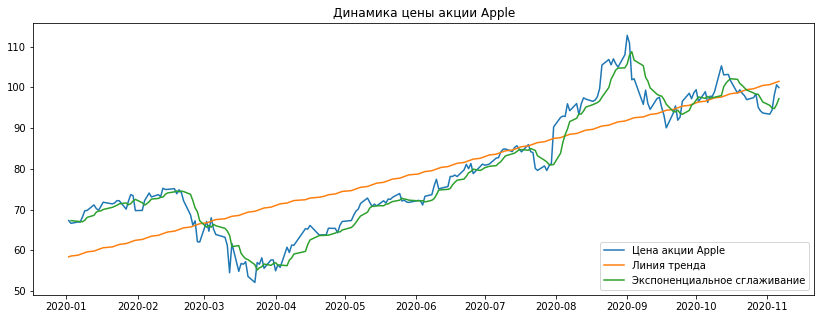

In [24]:
plt.figure(figsize=(14, 5))
plt.title('Динамика цены акции Apple', loc='center')
x = df['Date']
y = df['ClosingPrice']
yt = df['Trend']
ye = df['Exp03']
plt.plot(x, y, label = 'Цена акции Apple')
plt.plot(x, yt, label = 'Линия тренда')
plt.plot(x, ye, label = 'Экспоненциальное сглаживание')
plt.legend(loc='lower right')

Предсказанное значение

In [25]:
Predict = df['ClosingPrice'][len(df)-1] * 0.3 + df['Exp03'][len(df)-1] * 0.7
Predict

98.02108331207702

Рассчитаем остатки как разность значений цены акции и значений сглаженной кривой, добавим в набор столбец, содержащий остатки. Построим гистограмму остатков.

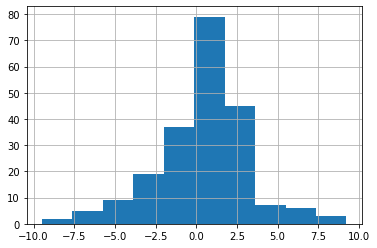

In [26]:
df['Epsilon'] = df['ClosingPrice'] - df['Exp03']
df['Epsilon'].hist()

## 2. Решене задачи регрессии с помощью машинного обучения

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

Прочитаем данные и выведем несколько первых строк

In [28]:
df = pd.read_csv('Data/cameras.csv')
df.head()

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0


Посмотрим информацию о данных. Размерность данных 1038х13 и есть пропущенные значения.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model                    1038 non-null   object 
 1   Release date             1038 non-null   int64  
 2   Max resolution           1038 non-null   float64
 3   Low resolution           1038 non-null   float64
 4   Effective pixels         1038 non-null   float64
 5   Zoom wide (W)            1038 non-null   float64
 6   Zoom tele (T)            1038 non-null   float64
 7   Normal focus range       1038 non-null   float64
 8   Macro focus range        1037 non-null   float64
 9   Storage included         1036 non-null   float64
 10  Weight (inc. batteries)  1036 non-null   float64
 11  Dimensions               1036 non-null   float64
 12  Price                    1038 non-null   float64
dtypes: float64(11), int64(1), object(1)
memory usage: 105.5+ KB


In [30]:
df.isnull().sum()

Model                      0
Release date               0
Max resolution             0
Low resolution             0
Effective pixels           0
Zoom wide (W)              0
Zoom tele (T)              0
Normal focus range         0
Macro focus range          1
Storage included           2
Weight (inc. batteries)    2
Dimensions                 2
Price                      0
dtype: int64

Описательная статистика

In [31]:
df.describe()

,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
count,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1037.000000,1036.000000,1036.000000,1036.000000,1038.000000
mean,2003.590559,2474.672447,1773.936416,4.596339,32.963391,121.525048,44.145472,7.787850,17.447876,319.265444,105.363417,457.384393
std,2.724755,759.513608,830.897955,2.844044,10.333149,93.455422,24.141959,8.100081,27.440655,260.410137,24.262761,760.452918
min,1994.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000
25%,2002.000000,2048.000000,1120.000000,3.000000,35.000000,96.000000,30.000000,3.000000,8.000000,180.000000,92.000000,149.000000
50%,2004.000000,2560.000000,2048.000000,4.000000,36.000000,108.000000,50.000000,6.000000,16.000000,226.000000,101.000000,199.000000
75%,2006.000000,3072.000000,2560.000000,7.000000,38.000000,117.000000,60.000000,10.000000,20.000000,350.000000,115.000000,399.000000
max,2007.000000,5616.000000,4992.000000,21.000000,52.000000,518.000000,120.000000,85.000000,450.000000,1860.000000,240.000000,7999.000000


In [32]:
df[df['Price']==7999.0]

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
52,Canon EOS-1Ds,2002,4064.0,2032.0,11.0,0.0,0.0,0.0,0.0,0.0,1585.0,156.0,7999.0
53,Canon EOS-1Ds Mark II,2004,4992.0,3600.0,16.0,0.0,0.0,0.0,0.0,0.0,1565.0,156.0,7999.0
54,Canon EOS-1Ds Mark III,2007,5616.0,4992.0,21.0,0.0,0.0,0.0,0.0,0.0,1385.0,150.0,7999.0


Матрица корреляций и heatmap.

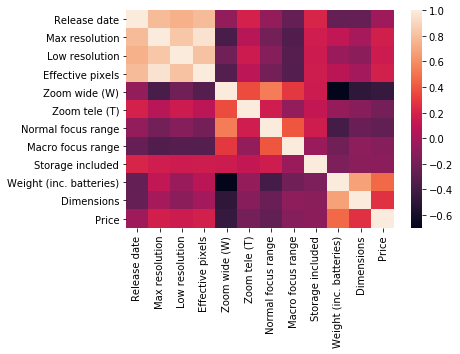

In [33]:
corr = df.corr()
sns.heatmap(corr)

По heatmap определяем:

   1. наиболее сильно положительно связаны: Max resolution и Effective pixels
   2. наиболее сильно отрицательно связаны: Weight(inc. batteries) и Zoom wide (W)

Узнаем сколько уникальных значений принимают переменные. И если будут переменные с небольшим количеством значений то возьмем в качестве категориальной одну из них.

In [34]:
df.nunique()

Model                      1038
Release date                 14
Max resolution               99
Low resolution               70
Effective pixels             16
Zoom wide (W)                25
Zoom tele (T)               100
Normal focus range           32
Macro focus range            29
Storage included             44
Weight (inc. batteries)     237
Dimensions                  101
Price                        43
dtype: int64

Попробуем описать цену камеры как функцию ее параметров и названия бренда. Целевой переменной будет 'Price'. Посчитаем матрицу корреляций.

In [35]:
corr = df.corr()
corr.head(13)

,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
Release date,1.000000,0.788682,0.745426,0.790742,-0.070643,0.192601,-0.074297,-0.253152,0.213093,-0.259681,-0.248877,-0.023249
Max resolution,0.788682,1.000000,0.838381,0.953949,-0.372648,0.069073,-0.199703,-0.346806,0.166222,0.106678,-0.000057,0.183202
Low resolution,0.745426,0.838381,1.000000,0.815669,-0.206905,0.154279,-0.125364,-0.315368,0.156652,-0.044927,-0.105585,0.154179
Effective pixels,0.790742,0.953949,0.815669,1.000000,-0.327096,0.084277,-0.192413,-0.321379,0.157844,0.078198,-0.004077,0.189149
Zoom wide (W),-0.070643,-0.372648,-0.206905,-0.327096,1.000000,0.364520,0.538564,0.293367,0.150968,-0.698782,-0.486542,-0.459236
Zoom tele (T),0.192601,0.069073,0.154279,0.084277,0.364520,1.000000,0.167579,-0.074597,0.114075,-0.065904,-0.118171,-0.189377
Normal focus range,-0.074297,-0.199703,-0.125364,-0.192413,0.538564,0.167579,1.000000,0.397870,0.159605,-0.393359,-0.237108,-0.273974
Macro focus range,-0.253152,-0.346806,-0.315368,-0.321379,0.293367,-0.074597,0.397870,1.000000,-0.043769,-0.210554,-0.090336,-0.127660
Storage included,0.213093,0.166222,0.156652,0.157844,0.150968,0.114075,0.159605,-0.043769,1.000000,-0.155568,-0.114280,-0.103046
Weight (inc. batteries),-0.259681,0.106678,-0.044927,0.078198,-0.698782,-0.065904,-0.393359,-0.210554,-0.155568,1.000000,0.677885,0.464760


Effective pixels и Max resolution сильно скоррелированны, попробуем убрать Max resolution.

In [36]:
df.drop(['Max resolution'], axis=1, inplace=True)

Вытащим название бренда из названия модели.

In [37]:
df['Brand'] = df['Model'].apply(lambda x: x.split()[0])
df.head()

,Model,Release date,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price,Brand
0,Agfa ePhoto 1280,1997,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0,Agfa
1,Agfa ePhoto 1680,1998,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0,Agfa
2,Agfa ePhoto CL18,2000,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0,Agfa
3,Agfa ePhoto CL30,1999,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0,Agfa
4,Agfa ePhoto CL30 Clik!,1999,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0,Agfa


Количество названий брендов.

In [38]:
df['Brand'].unique().shape[0]

21

In [39]:
print(df['Brand'].unique())

['Agfa' 'Canon' 'Casio' 'Contax' 'Epson' 'Fujifilm' 'HP' 'JVC' 'Kodak'
 'Kyocera' 'Leica' 'Nikon' 'Olympus' 'Panasonic' 'Pentax' 'Ricoh'
 'Samsung' 'Sanyo' 'Sigma' 'Sony' 'Toshiba']


Разобьем данные на признаки и целевую переменную. В матрице признаков удалим колонку Model.

In [41]:
y = df['Price']
X = df.drop(['Model','Price'], axis=1)
X.head()

,Release date,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Brand
0,1997,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,Agfa
1,1998,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,Agfa
2,2000,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,Agfa
3,1999,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,Agfa
4,1999,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,Agfa


In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Release date             1038 non-null   int64  
 1   Low resolution           1038 non-null   float64
 2   Effective pixels         1038 non-null   float64
 3   Zoom wide (W)            1038 non-null   float64
 4   Zoom tele (T)            1038 non-null   float64
 5   Normal focus range       1038 non-null   float64
 6   Macro focus range        1037 non-null   float64
 7   Storage included         1036 non-null   float64
 8   Weight (inc. batteries)  1036 non-null   float64
 9   Dimensions               1036 non-null   float64
 10  Brand                    1038 non-null   object 
dtypes: float64(9), int64(1), object(1)
memory usage: 89.3+ KB


Заменим отсутствующие данные нулями в колонках Macro focus range, Storage included, Weight (inc. batteries), Dimensions.

In [43]:
X = X.fillna(0)

Будем считать, что все параметры не нулевые, т.к. любая камера имеет размеры, вес и будем считать, что и другие ее физические параметры существуют. Поэтому заменим все 0 на средние значения.

In [44]:
for feature in X.loc[:, 'Low resolution':'Dimensions'].columns:
    mean_feature = X[feature][X[feature]!=0].mean()
    X.loc[X[feature]==0, feature] = mean_feature
X.head()

,Release date,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Brand
0,1997,640.000000,4.75673,38.0,114.0,70.000000,40.000000,4.0,420.000000,95.000000,Agfa
1,1998,640.000000,1.00000,38.0,114.0,50.000000,8.874725,4.0,420.000000,158.000000,Agfa
2,2000,1871.286585,4.75673,45.0,45.0,50.857936,8.874725,2.0,325.870936,106.806751,Agfa
3,1999,640.000000,4.75673,35.0,35.0,50.857936,8.874725,4.0,325.870936,106.806751,Agfa
4,1999,640.000000,4.75673,43.0,43.0,50.000000,8.874725,40.0,300.000000,128.000000,Agfa


In [45]:
X.describe()

,Release date,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions
count,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000
mean,2003.590559,1871.286585,4.756730,35.903463,132.364113,50.857936,8.874725,19.798467,325.870936,106.806751
std,2.724755,719.396879,2.711211,3.125026,86.112878,16.918142,7.555371,26.656407,256.077684,20.871469
min,1994.000000,320.000000,1.000000,23.000000,28.000000,1.000000,1.000000,1.000000,100.000000,30.000000
25%,2002.000000,1296.000000,3.000000,35.000000,105.000000,40.000000,5.000000,10.000000,181.500000,92.250000
50%,2004.000000,2048.000000,4.756730,36.000000,114.000000,50.000000,8.874725,16.000000,230.000000,103.000000
75%,2006.000000,2560.000000,7.000000,38.000000,132.364113,60.000000,10.000000,20.000000,347.500000,115.000000
max,2007.000000,4992.000000,21.000000,52.000000,518.000000,120.000000,85.000000,450.000000,1860.000000,240.000000


Переведем названия бренда в числовое представление.

In [46]:
X = pd.get_dummies(X, columns=['Brand'], drop_first=True)
X.head()

,Release date,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,...,Brand_Nikon,Brand_Olympus,Brand_Panasonic,Brand_Pentax,Brand_Ricoh,Brand_Samsung,Brand_Sanyo,Brand_Sigma,Brand_Sony,Brand_Toshiba
0,1997,640.000000,4.75673,38.0,114.0,70.000000,40.000000,4.0,420.000000,95.000000,...,0,0,0,0,0,0,0,0,0,0
1,1998,640.000000,1.00000,38.0,114.0,50.000000,8.874725,4.0,420.000000,158.000000,...,0,0,0,0,0,0,0,0,0,0
2,2000,1871.286585,4.75673,45.0,45.0,50.857936,8.874725,2.0,325.870936,106.806751,...,0,0,0,0,0,0,0,0,0,0
3,1999,640.000000,4.75673,35.0,35.0,50.857936,8.874725,4.0,325.870936,106.806751,...,0,0,0,0,0,0,0,0,0,0
4,1999,640.000000,4.75673,43.0,43.0,50.000000,8.874725,40.0,300.000000,128.000000,...,0,0,0,0,0,0,0,0,0,0


Теперь стандартизируем признаки.

In [49]:
scaler = StandardScaler()

Разобъем данные на обучающую и тестовую выборки. Обучим модель, сделаем предсказание и оценим модель коэфициентом детерминации.

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_predict = lr.predict(X_test_scaled)

r2_score(y_test, y_predict)

0.40321044730853206

In [53]:
pd.DataFrame({'y_predict':y_predict, 'y_test':y_test}).head(10)

,y_predict,y_test
248,32.313869,169.0
418,-79.357463,296.0
592,567.095434,449.0
64,1419.851879,549.0
524,341.852780,99.0
712,1401.371951,299.0
195,928.777019,229.0
731,1044.015119,149.0
285,179.019136,179.0
1035,214.558396,62.0


Посчитанные коэффициенты.

In [55]:
lr.coef_

array([  55.39254556,    1.59503782,  127.88848975,   42.31078649,
       -170.31221571,   -3.1562938 ,   51.78313651,    2.96229854,
        427.44378693,    7.22643313,   84.93724389,   32.17032135,
         16.63565213,   45.07248001,   23.07723249,   -3.17947999,
         -7.63728499,  -99.72742775,  107.32493707,  -10.07781187,
         67.39879578,  133.09888454,  189.0404336 ,   21.50180633,
         97.80208662,  -15.49426825,   46.39643773,   -6.54340448,
         87.29994649,    2.10961727])

In [56]:
lr.intercept_

463.842168674698

Графики зависимости целевой переменной от одного из признаков(стандартизировнного) и линию регрессии

In [ ]:
xx = np.linspace(-3,3,100)
yy = lr.coef_[1]*xx + lr.intercept_
plt.scatter(X_test_scaled[:,2], y_test)
plt.plot(xx, yy, c='red', label='regression line')
plt.xlabel('Test X[Max resolution] scaled')
plt.ylabel('Price from Test Sample')
plt.legend();

Модель линейно приблизила данные.

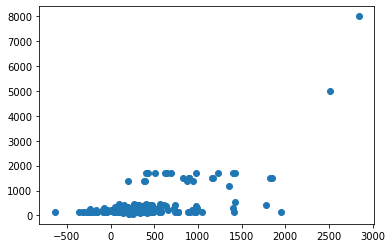

In [58]:
plt.scatter(y_predict, y_test)

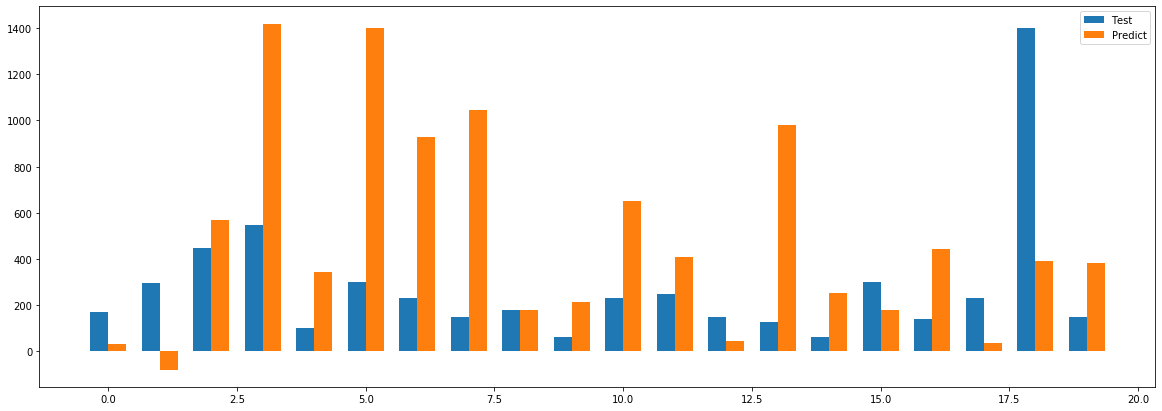

In [59]:
n_samples = 20
x = np.arange(len(y_test[:n_samples]))
width = 0.35

fig, ax = plt.subplots(1, 1, figsize=(20, 7))

rects1 = ax.bar(x - width/2, y_test[:n_samples], width, label='Test')
rects2 = ax.bar(x + width/2, y_predict[:n_samples], width, label='Predict')
#ax.set_ylim(-1000, 8000)
#ax.set_yscale('log')
ax.legend()

### Mетрики качества регрессии. 

MSE (*mean squared error*)


$$ MSE = \frac{1}{N}\sum_{i=1}^{N} (y_i - \hat{y}_i)^2 $$


MAE (*mean absolute error*)

$$ MAE = \frac{1}{N}\sum_{i=1}^{N} |y_i - \hat{y}_i| $$

MAPE (*mean absolute percentage error*)

$$ MAPE = \frac{1}{N}\sum_{i=1}^{N} \frac{|y_i - \hat{y}_i|}{|y_i|} $$

$R^2$ - коэффициент детерминации

$$ R^2 =1- \frac{ \frac{1}{N}\sum_{i=1}^{N} (y_i - \hat{y}_i)^2}{ \frac{1}{N}\sum_{i=1}^{N} (y_i - \bar{y}_i)^2} $$

In [60]:
def mse(y_true, y_pred):
    N = len(y_true)
    return sum((y_true-y_pred)**2) / N

def mae(y_true, y_pred):
    N = len(y_true)
    return sum(np.abs(y_true-y_pred)) / N

def mape(y_true, y_pred):
    N = len(y_true)
    return sum(np.abs(y_true-y_pred) / y_true) / N

def r2(y_true, y_pred):
    N = len(y_true)
    error_var = 1/(N-1) * sum((y_true - y_pred) ** 2)
    y_var = y_true.var()
    return 1 - error_var / y_var

In [61]:
print('MSE: ', mse(y_test, y_predict))
print('MAE: ', mae(y_test, y_predict))
print('MAPE:',  mape(y_test, y_predict))
print('R2: ', r2(y_test, y_predict))

MSE:  340727.71971062024
MAE:  332.5148350511685
MAPE: 1.3088871775914586
R2:  0.40321044730853295


In [62]:
print(np.isclose(mse(y_test, y_predict), mean_squared_error(y_test, y_predict)))
print(np.isclose(mae(y_test, y_predict), mean_absolute_error(y_test, y_predict)))
print(np.isclose(r2(y_test, y_predict), r2_score(y_test, y_predict)))

True
True
True
